# Notebook 03: Análisis Exploratorio de Datos (EDA)

**Hito 1 - Análisis de Redes y Consumo de Servicios**

Este notebook realiza:
1. Carga de datos limpios
2. Construcción de red bipartita Persona-Servicio
3. Proyección cliente-cliente ponderada
4. Cálculo de métricas básicas (N, E, densidad, grado, fuerza, LCC)
5. Generación de figuras descriptivas

**Alcance Hito 1**: NO incluye comunidades, centralidades costosas ni filtros avanzados

## 1. Importación de Librerías

In [26]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Añadir src/ al path
sys.path.insert(0, str(Path.cwd().parent / 'src'))

# Limpiar módulos cargados anteriormente si existen
modules_to_reload = ['config_loader', 'logging_setup', 'io_utils', 'validate', 'cleaning', 'network_prep', 'eda_basic']
for mod in modules_to_reload:
    if mod in sys.modules:
        del sys.modules[mod]

# Importar módulos del proyecto
import config_loader
import logging_setup
import io_utils
import network_prep
import eda_basic

# Imports específicos para usar directamente
from config_loader import load_config, get_absolute_path
from logging_setup import get_etl_logger, log_section
from io_utils import read_data_file
from network_prep import prepare_networks
from eda_basic import (
    compute_basic_metrics,
    compute_weighted_metrics,
    generate_all_plots,
    export_metrics_summary,
    print_metrics_summary
)

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 2. Carga de Configuración y Datos Limpios

In [27]:
# Cargar configuración
config = load_config()

# Inicializar logger
logger = get_etl_logger(config)
log_section(logger, "NOTEBOOK 03: ANÁLISIS EXPLORATORIO (EDA)")

# Configurar semilla aleatoria para reproducibilidad
np.random.seed(config['random_seed'])

print("✓ Configuración cargada")
print(f"  Semilla aleatoria: {config['random_seed']}")

2025-10-28 00:50:03 | INFO     | etl_pipeline | ================================================================================
2025-10-28 00:50:03 | INFO     | etl_pipeline |   NOTEBOOK 03: ANÁLISIS EXPLORATORIO (EDA)
2025-10-28 00:50:03 | INFO     | etl_pipeline | ================================================================================
✓ Configuración cargada
  Semilla aleatoria: 42
2025-10-28 00:50:03 | INFO     | etl_pipeline |   NOTEBOOK 03: ANÁLISIS EXPLORATORIO (EDA)
2025-10-28 00:50:03 | INFO     | etl_pipeline | ================================================================================
✓ Configuración cargada
  Semilla aleatoria: 42


In [12]:
# Cargar datos limpios
processed_path = get_absolute_path(config, 'data_processed')
clean_file = processed_path / config['outputs']['datos_limpios']

data_clean = read_data_file(clean_file)

logger.info(f"Datos limpios cargados: {data_clean.shape}")
print(f"📊 Datos limpios: {data_clean.shape}")
print(f"\nPrimeras filas:")
display(data_clean.head())

2025-10-27 23:49:31 | INFO     | etl_pipeline | Datos limpios cargados: (7955, 6)
📊 Datos limpios: (7955, 6)

Primeras filas:
📊 Datos limpios: (7955, 6)

Primeras filas:


,AÑO,PERSONA,TIPO DE SERVICIO,NOMBRE DE LA TAREA,MODALIDAD,COMPLEJIDAD
0,2019,Id_1,Serv_1,Tarea_1.1,Presencial,Baja
1,2019,Id_2,Serv_1,Tarea_1.1,Presencial,Baja
2,2019,Id_3,Serv_1,Tarea_1.1,Presencial,Baja
3,2019,Id_4,Serv_1,Tarea_1.1,Presencial,Baja
4,2019,Id_5,Serv_1,Tarea_1.1,Presencial,Baja


## 3. Estadísticas Descriptivas del Dataset

In [13]:
# Resumen por columnas categóricas
print("="*60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)

print("\nDistribución por Modalidad:")
print(data_clean['MODALIDAD'].value_counts())

print("\nDistribución por Complejidad:")
print(data_clean['COMPLEJIDAD'].value_counts())

print("\nDistribución por Año:")
print(data_clean['AÑO'].value_counts().sort_index())

print("\nNúmero de personas únicas:", data_clean['PERSONA'].nunique())
print("Número de servicios únicos:", data_clean['TIPO DE SERVICIO'].nunique())
print("Número de tareas únicas:", data_clean['NOMBRE DE LA TAREA'].nunique())

ESTADÍSTICAS DESCRIPTIVAS

Distribución por Modalidad:
MODALIDAD
Virtual       4610
Presencial    3345
Name: count, dtype: int64

Distribución por Complejidad:
COMPLEJIDAD
Baja       5764
Mediana    2184
Alta          7
Name: count, dtype: int64

Distribución por Año:
AÑO
2019     298
2020     978
2021    2853
2022    1937
2023    1279
2024     610
Name: count, dtype: int64

Número de personas únicas: 5090
Número de servicios únicos: 7
Número de tareas únicas: 18


## 4. Construcción de Redes

In [14]:
# Preparar redes: bipartita y proyección cliente-cliente
G_bipartito, G_proyeccion, edges_bipartita, edges_proyeccion = prepare_networks(
    data_clean,
    config,
    processed_path
)

print("\n" + "="*60)
print("REDES CONSTRUIDAS")
print("="*60)
print(f"Red Bipartita Persona-Servicio:")
print(f"  Nodos: {G_bipartito.number_of_nodes()}")
print(f"  Aristas: {G_bipartito.number_of_edges()}")

print(f"\nRed Proyección Cliente-Cliente:")
print(f"  Nodos: {G_proyeccion.number_of_nodes()}")
print(f"  Aristas: {G_proyeccion.number_of_edges()}")


REDES CONSTRUIDAS
Red Bipartita Persona-Servicio:
  Nodos: 5097
  Aristas: 6301

Red Proyección Cliente-Cliente:
  Nodos: 5090
  Aristas: 7189307


## 5. Cálculo de Métricas Básicas

In [15]:
# Métricas de la red bipartita
print("="*60)
print("MÉTRICAS: RED BIPARTITA PERSONA-SERVICIO")
print("="*60)

metrics_bipartita = compute_basic_metrics(G_bipartito)
print_metrics_summary(metrics_bipartita)

MÉTRICAS: RED BIPARTITA PERSONA-SERVICIO

RESUMEN DE MÉTRICAS DE RED

Métricas Básicas:
  Nodos (N):              5,097
  Aristas (E):            6,301
  Densidad:               0.000485
  Grado medio:            2.47
  Grado máximo:           2957
  Grado mínimo:           1
  Nodos aislados:         0 (0.0%)
  Componentes conectados: 1
  Tamaño del LCC:         5097 (100.0%)
  Clustering global:      0.0000


RESUMEN DE MÉTRICAS DE RED

Métricas Básicas:
  Nodos (N):              5,097
  Aristas (E):            6,301
  Densidad:               0.000485
  Grado medio:            2.47
  Grado máximo:           2957
  Grado mínimo:           1
  Nodos aislados:         0 (0.0%)
  Componentes conectados: 1
  Tamaño del LCC:         5097 (100.0%)
  Clustering global:      0.0000



In [16]:
# Métricas de la red proyección cliente-cliente
print("="*60)
print("MÉTRICAS: RED PROYECCIÓN CLIENTE-CLIENTE")
print("="*60)

metrics_basic = compute_basic_metrics(G_proyeccion)
metrics_weighted = compute_weighted_metrics(G_proyeccion)

print_metrics_summary(metrics_basic, metrics_weighted)

MÉTRICAS: RED PROYECCIÓN CLIENTE-CLIENTE

RESUMEN DE MÉTRICAS DE RED

Métricas Básicas:
  Nodos (N):              5,090
  Aristas (E):            7,189,307
  Densidad:               0.555094
  Grado medio:            2824.88
  Grado máximo:           5049
  Grado mínimo:           40
  Nodos aislados:         0 (0.0%)
  Componentes conectados: 1
  Tamaño del LCC:         5090 (100.0%)
  Clustering global:      0.8761

Métricas Ponderadas:
  Fuerza media:           2918.40
  Fuerza máxima:          6186.00
  Fuerza mínima:          40.00
  Desv. std. fuerza:      1149.56
  Peso total red:         7427318
  Peso medio arista:      1.03


RESUMEN DE MÉTRICAS DE RED

Métricas Básicas:
  Nodos (N):              5,090
  Aristas (E):            7,189,307
  Densidad:               0.555094
  Grado medio:            2824.88
  Grado máximo:           5049
  Grado mínimo:           40
  Nodos aislados:         0 (0.0%)
  Componentes conectados: 1
  Tamaño del LCC:         5090 (100.0%)
  Clusteri

## 6. Análisis de la Componente Gigante (LCC)

In [17]:
# Extraer la componente conexa más grande (LCC)
if G_proyeccion.number_of_nodes() > 0:
    components = list(nx.connected_components(G_proyeccion))
    lcc_nodes = max(components, key=len)
    G_lcc = G_proyeccion.subgraph(lcc_nodes).copy()
    
    print("\n" + "="*60)
    print("COMPONENTE CONEXA MÁS GRANDE (LCC)")
    print("="*60)
    
    metrics_lcc = compute_basic_metrics(G_lcc)
    metrics_lcc_weighted = compute_weighted_metrics(G_lcc)
    
    print_metrics_summary(metrics_lcc, metrics_lcc_weighted)
else:
    print("\n⚠️  Red vacía, no se puede analizar LCC")


COMPONENTE CONEXA MÁS GRANDE (LCC)

RESUMEN DE MÉTRICAS DE RED

Métricas Básicas:
  Nodos (N):              5,090
  Aristas (E):            7,189,307
  Densidad:               0.555094
  Grado medio:            2824.88
  Grado máximo:           5049
  Grado mínimo:           40
  Nodos aislados:         0 (0.0%)
  Componentes conectados: 1
  Tamaño del LCC:         5090 (100.0%)
  Clustering global:      0.8761

Métricas Ponderadas:
  Fuerza media:           2918.40
  Fuerza máxima:          6186.00
  Fuerza mínima:          40.00
  Desv. std. fuerza:      1149.56
  Peso total red:         7427318
  Peso medio arista:      1.03


RESUMEN DE MÉTRICAS DE RED

Métricas Básicas:
  Nodos (N):              5,090
  Aristas (E):            7,189,307
  Densidad:               0.555094
  Grado medio:            2824.88
  Grado máximo:           5049
  Grado mínimo:           40
  Nodos aislados:         0 (0.0%)
  Componentes conectados: 1
  Tamaño del LCC:         5090 (100.0%)
  Clustering gl

## 7. Generación de Figuras

In [28]:
# Generar todas las figuras
figures_path = get_absolute_path(config, 'figures')

generate_all_plots(
    data_clean,
    G_proyeccion,
    figures_path,
    config
)

print("\n✓ Figuras generadas en:", figures_path)
print("  - hist_grado.png")
print("  - hist_fuerza.png")
print("  - barras_modalidad_por_anio.png")
print("  - barras_complejidad_por_anio.png")


✓ Figuras generadas en: /Users/kanyewest/Documents/ComplexNetworks/ComplexNetworks_TP/reports/figures
  - hist_grado.png
  - hist_fuerza.png
  - barras_modalidad_por_anio.png
  - barras_complejidad_por_anio.png


## 8. Exportación de Resumen de Métricas

In [19]:
# Exportar resumen de métricas a CSV
reports_path = get_absolute_path(config, 'reports')

export_metrics_summary(
    metrics_basic,
    metrics_weighted,
    reports_path
)

print("\n✓ Resumen de métricas exportado: metricas_resumen.csv")


✓ Resumen de métricas exportado: metricas_resumen.csv


## 9. Análisis de Top Nodos

In [20]:
# Top 10 nodos por grado
degrees = dict(G_proyeccion.degree())
top_degree = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]

print("\n" + "="*60)
print("TOP 10 CLIENTES POR GRADO")
print("="*60)
for i, (node, degree) in enumerate(top_degree, 1):
    print(f"{i:2d}. {node}: {degree} conexiones")


TOP 10 CLIENTES POR GRADO
 1. Id_329: 5049 conexiones
 2. Id_2982: 5041 conexiones
 3. Id_3124: 4996 conexiones
 4. Id_92: 4988 conexiones
 5. Id_10: 4988 conexiones
 6. Id_3189: 4988 conexiones
 7. Id_982: 4988 conexiones
 8. Id_4543: 4982 conexiones
 9. Id_37: 4982 conexiones
10. Id_3648: 4982 conexiones


In [21]:
# Top 10 nodos por fuerza (strength)
strengths = dict(G_proyeccion.degree(weight='weight'))
top_strength = sorted(strengths.items(), key=lambda x: x[1], reverse=True)[:10]

print("\n" + "="*60)
print("TOP 10 CLIENTES POR FUERZA (STRENGTH)")
print("="*60)
for i, (node, strength) in enumerate(top_strength, 1):
    print(f"{i:2d}. {node}: {strength:.1f} servicios compartidos totales")


TOP 10 CLIENTES POR FUERZA (STRENGTH)
 1. Id_3124: 6186.0 servicios compartidos totales
 2. Id_4543: 6146.0 servicios compartidos totales
 3. Id_37: 6146.0 servicios compartidos totales
 4. Id_3648: 6146.0 servicios compartidos totales
 5. Id_4909: 6146.0 servicios compartidos totales
 6. Id_355: 6146.0 servicios compartidos totales
 7. Id_3663: 6146.0 servicios compartidos totales
 8. Id_3167: 6146.0 servicios compartidos totales
 9. Id_3169: 6146.0 servicios compartidos totales
10. Id_4702: 6146.0 servicios compartidos totales


## 10. Resumen Final

In [23]:
print("\n" + "="*60)
print("ANÁLISIS EXPLORATORIO COMPLETADO")
print("="*60)
print("\nArtefactos generados:")
print(f"  ✓ {config['outputs']['edges_bipartita']}")
print(f"  ✓ {config['outputs']['proyeccion_cc_ponderada']}")
print(f"  ✓ hist_grado.png")
print(f"  ✓ hist_fuerza.png")
print(f"  ✓ barras_modalidad_por_anio.png")
print(f"  ✓ barras_complejidad_por_anio.png")
print(f"  ✓ metricas_resumen.csv")
print("="*60)


ANÁLISIS EXPLORATORIO COMPLETADO

Artefactos generados:
  ✓ edges_bipartita.csv
  ✓ proyeccion_cc_ponderada.csv
  ✓ hist_grado.png
  ✓ hist_fuerza.png
  ✓ barras_modalidad_por_anio.png
  ✓ barras_complejidad_por_anio.png
  ✓ metricas_resumen.csv


# VISUALIZACIONES ADJUNTAS MANUALMENTE (EXTRAÍDAS DEL REPOSITORIO)

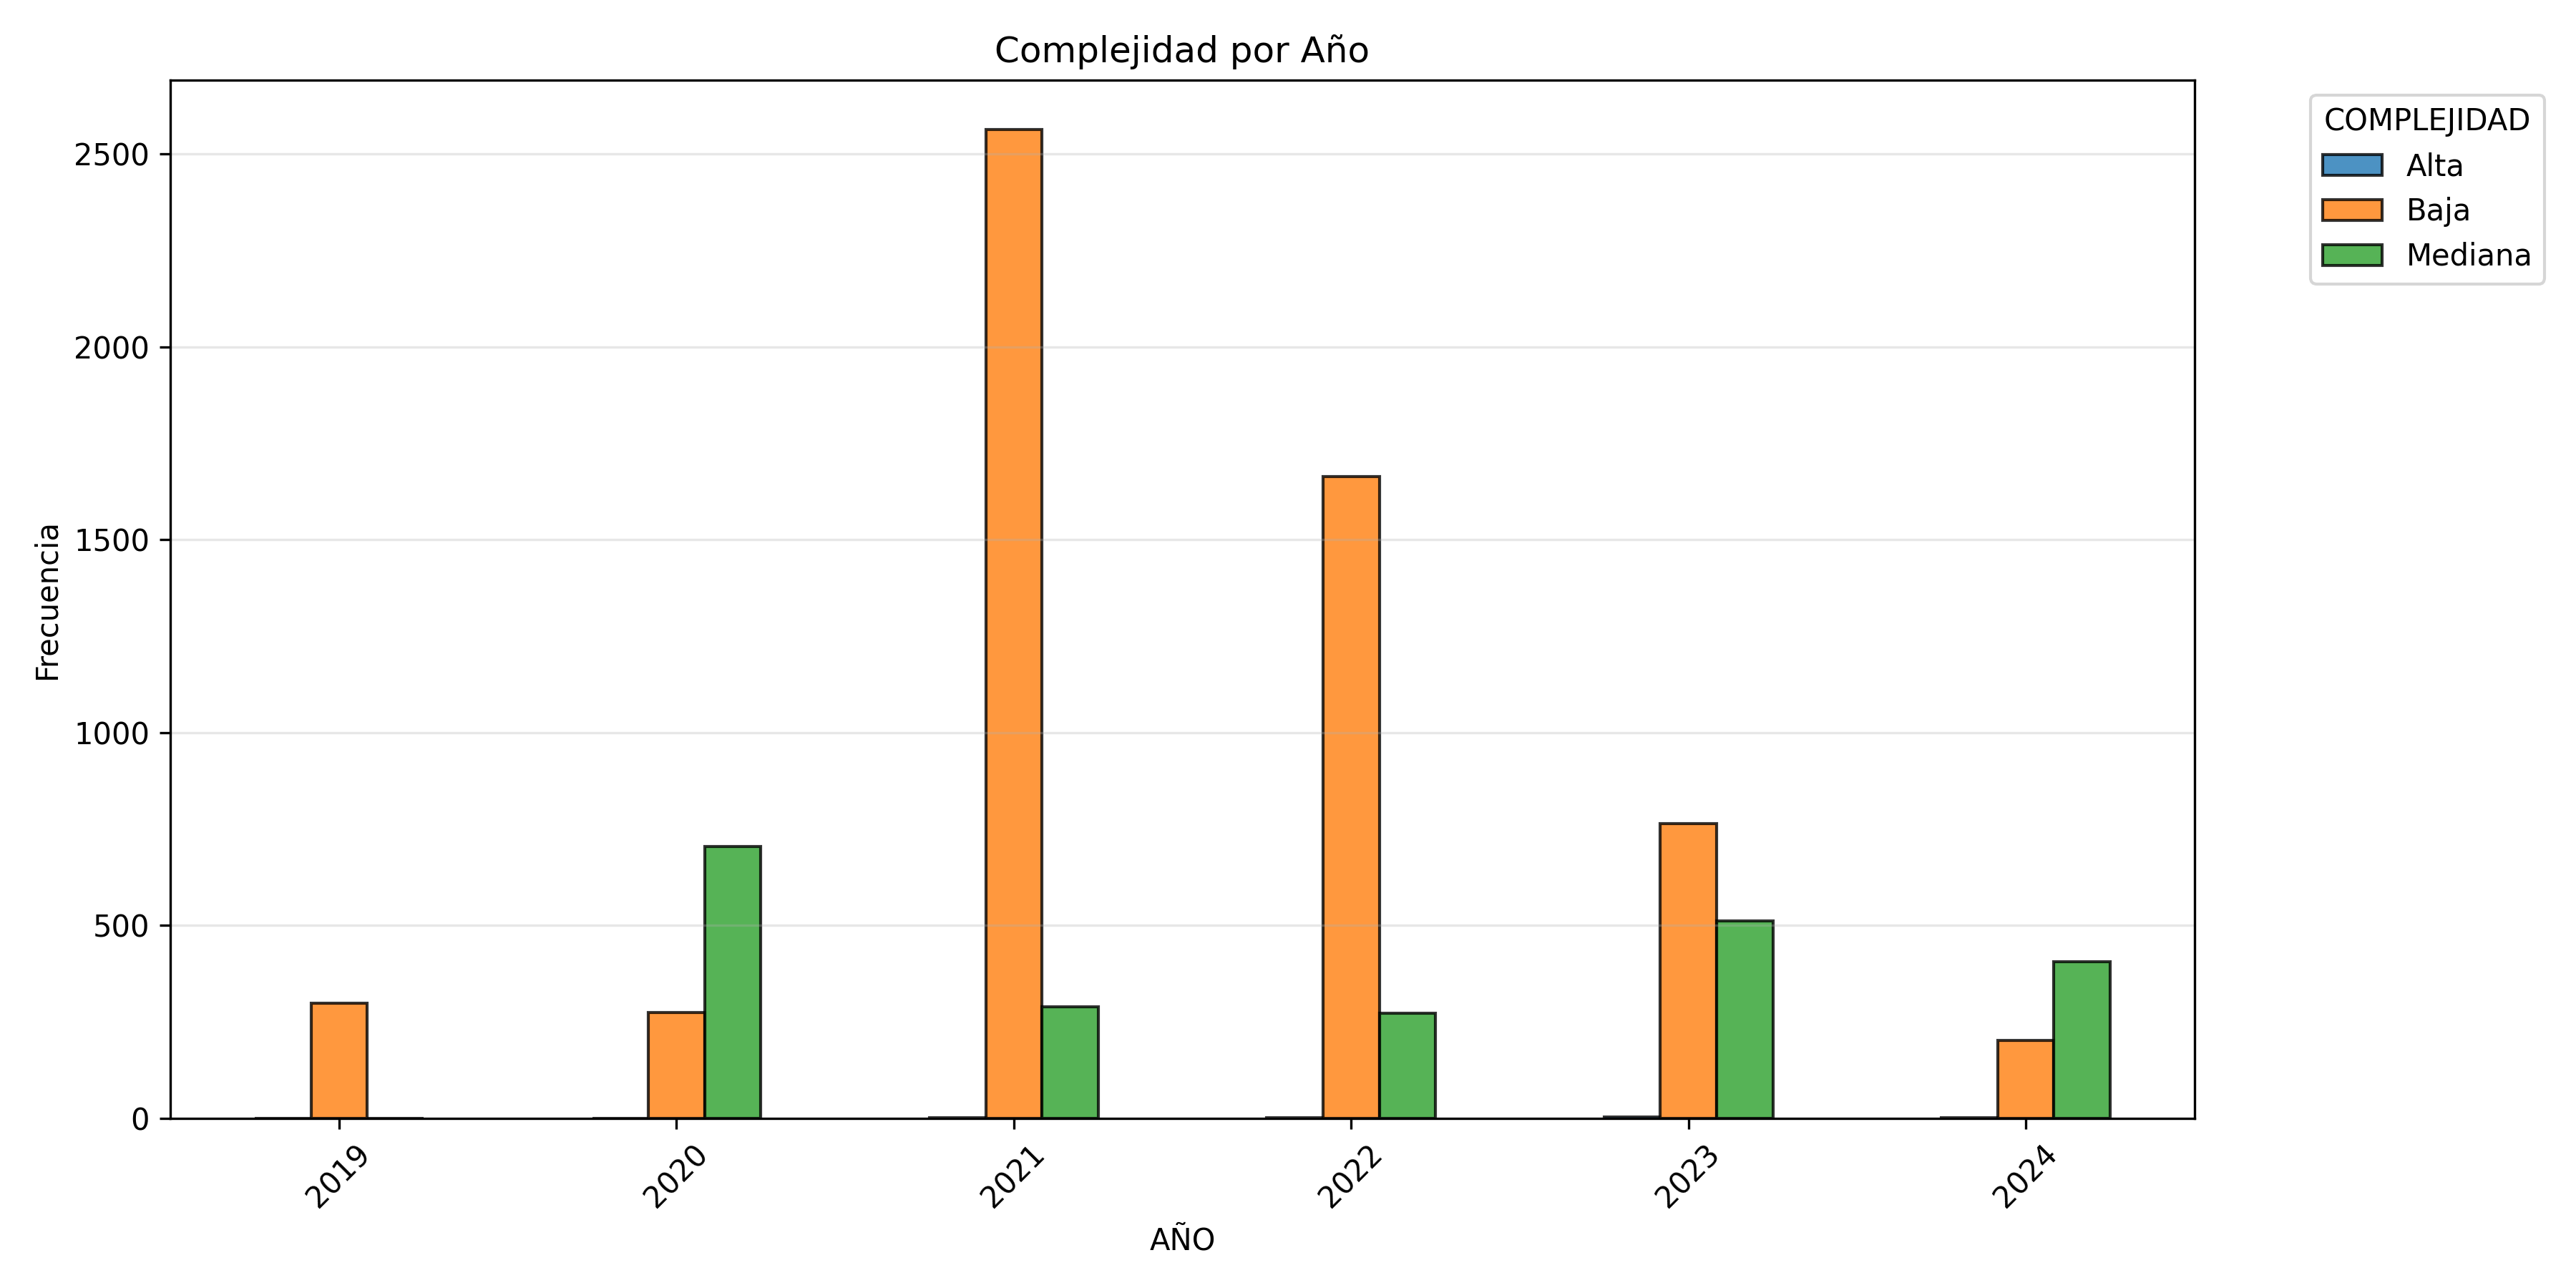

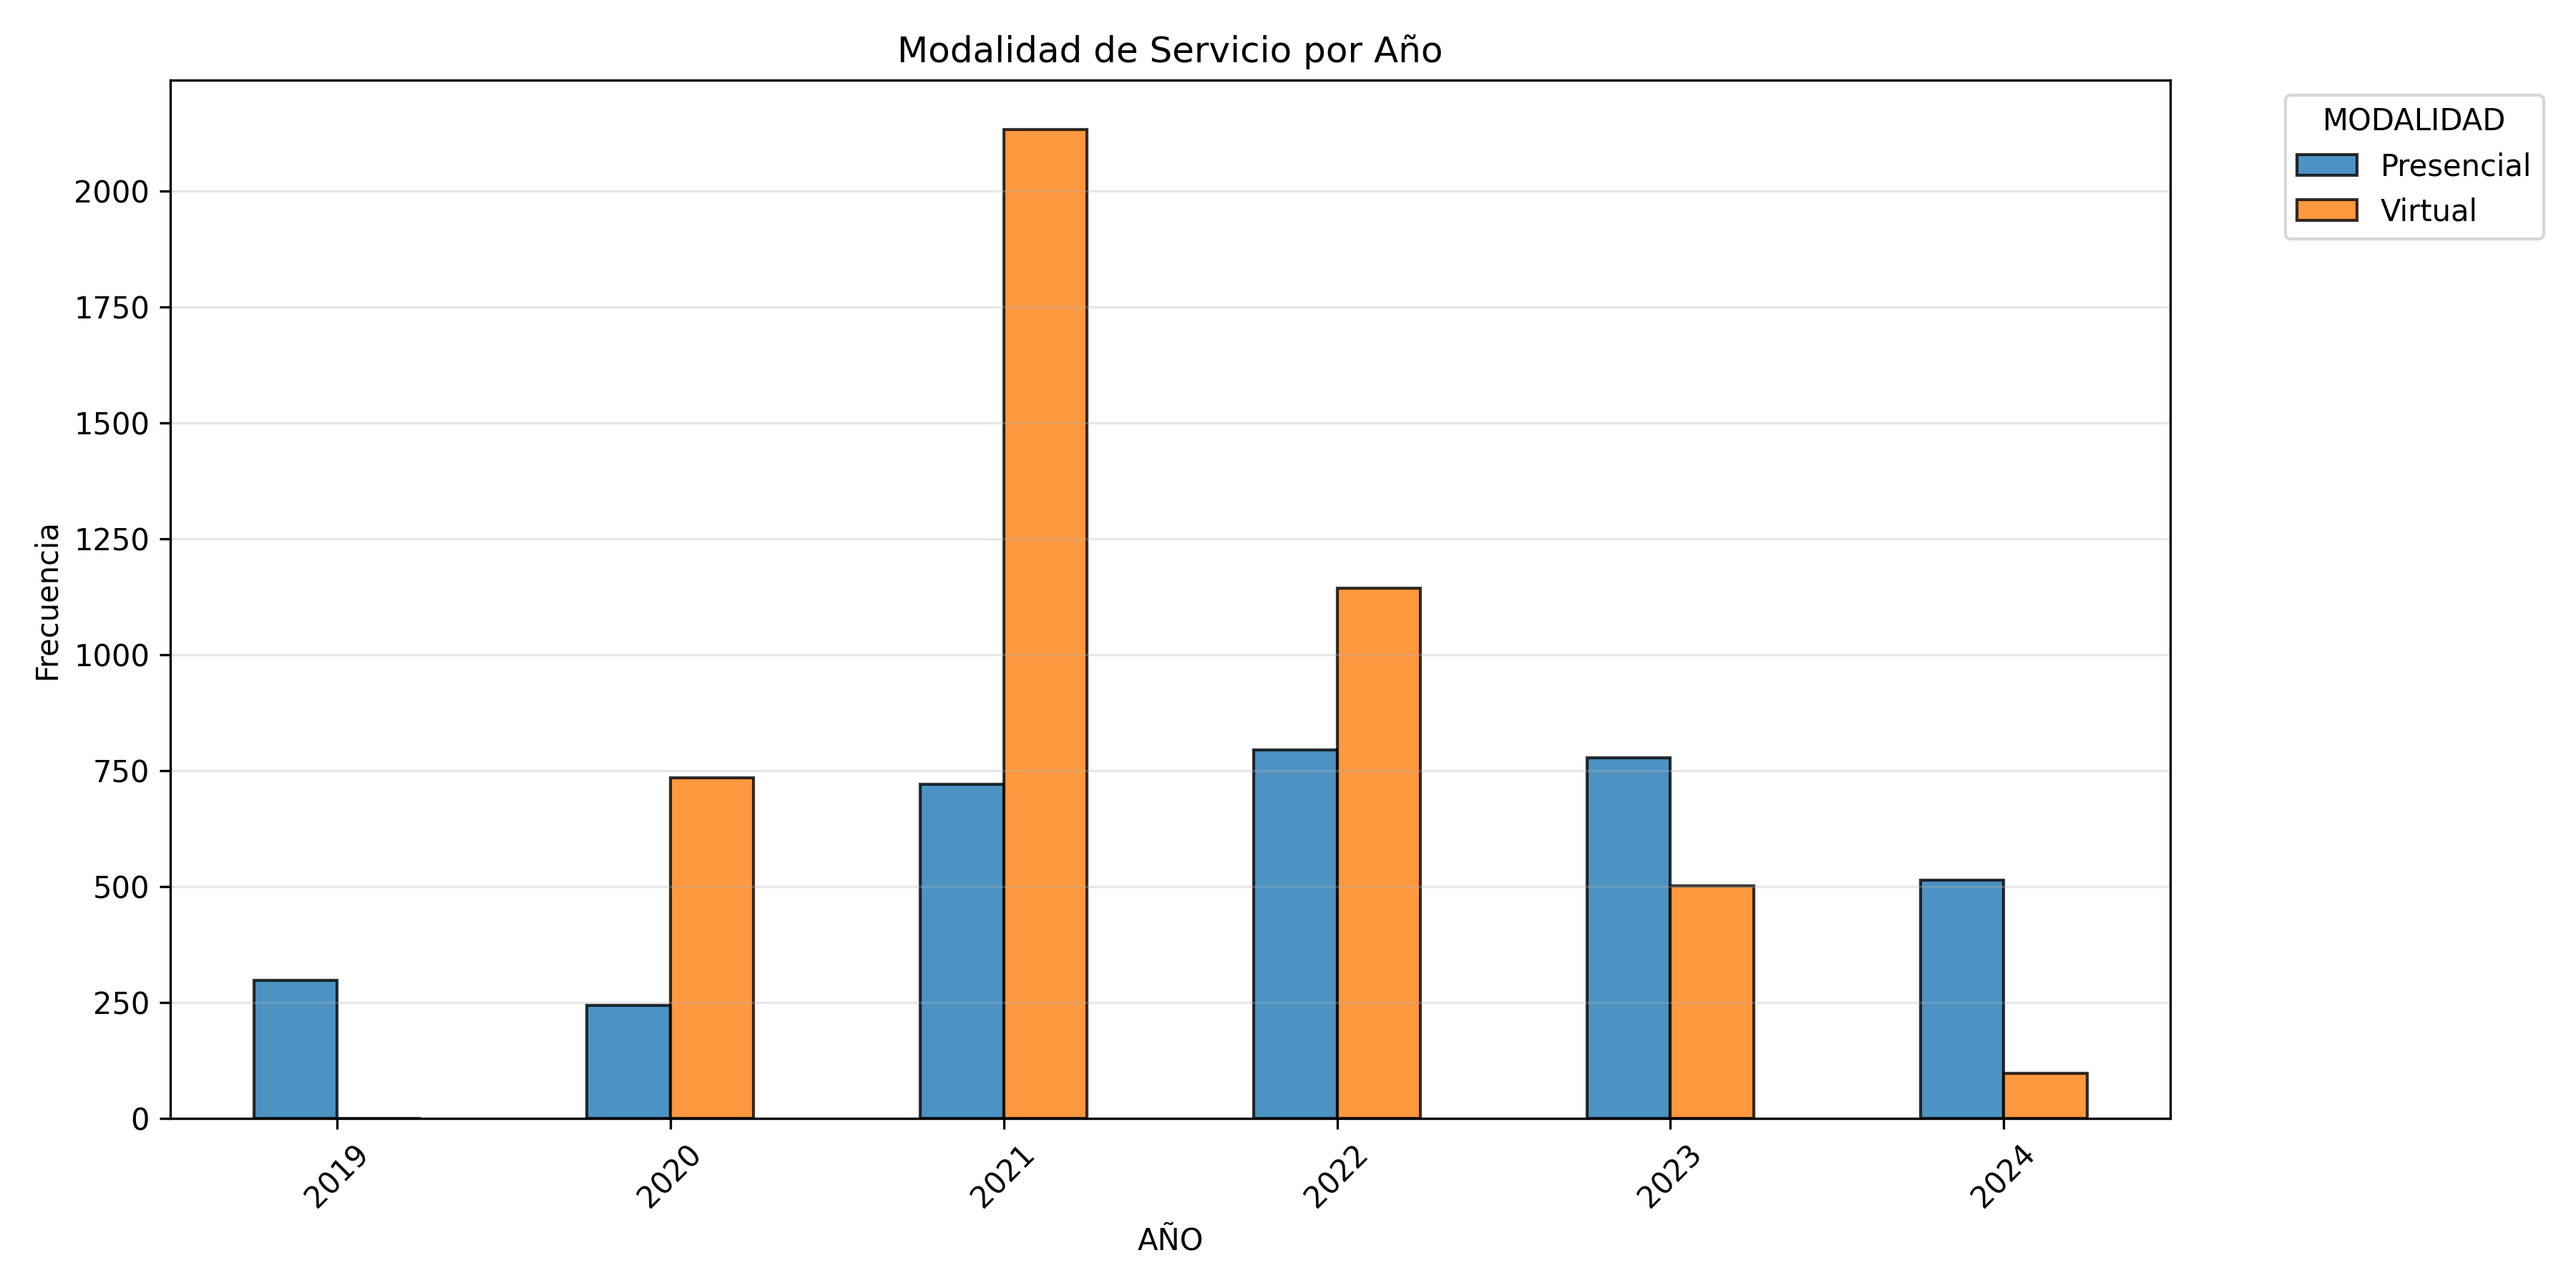

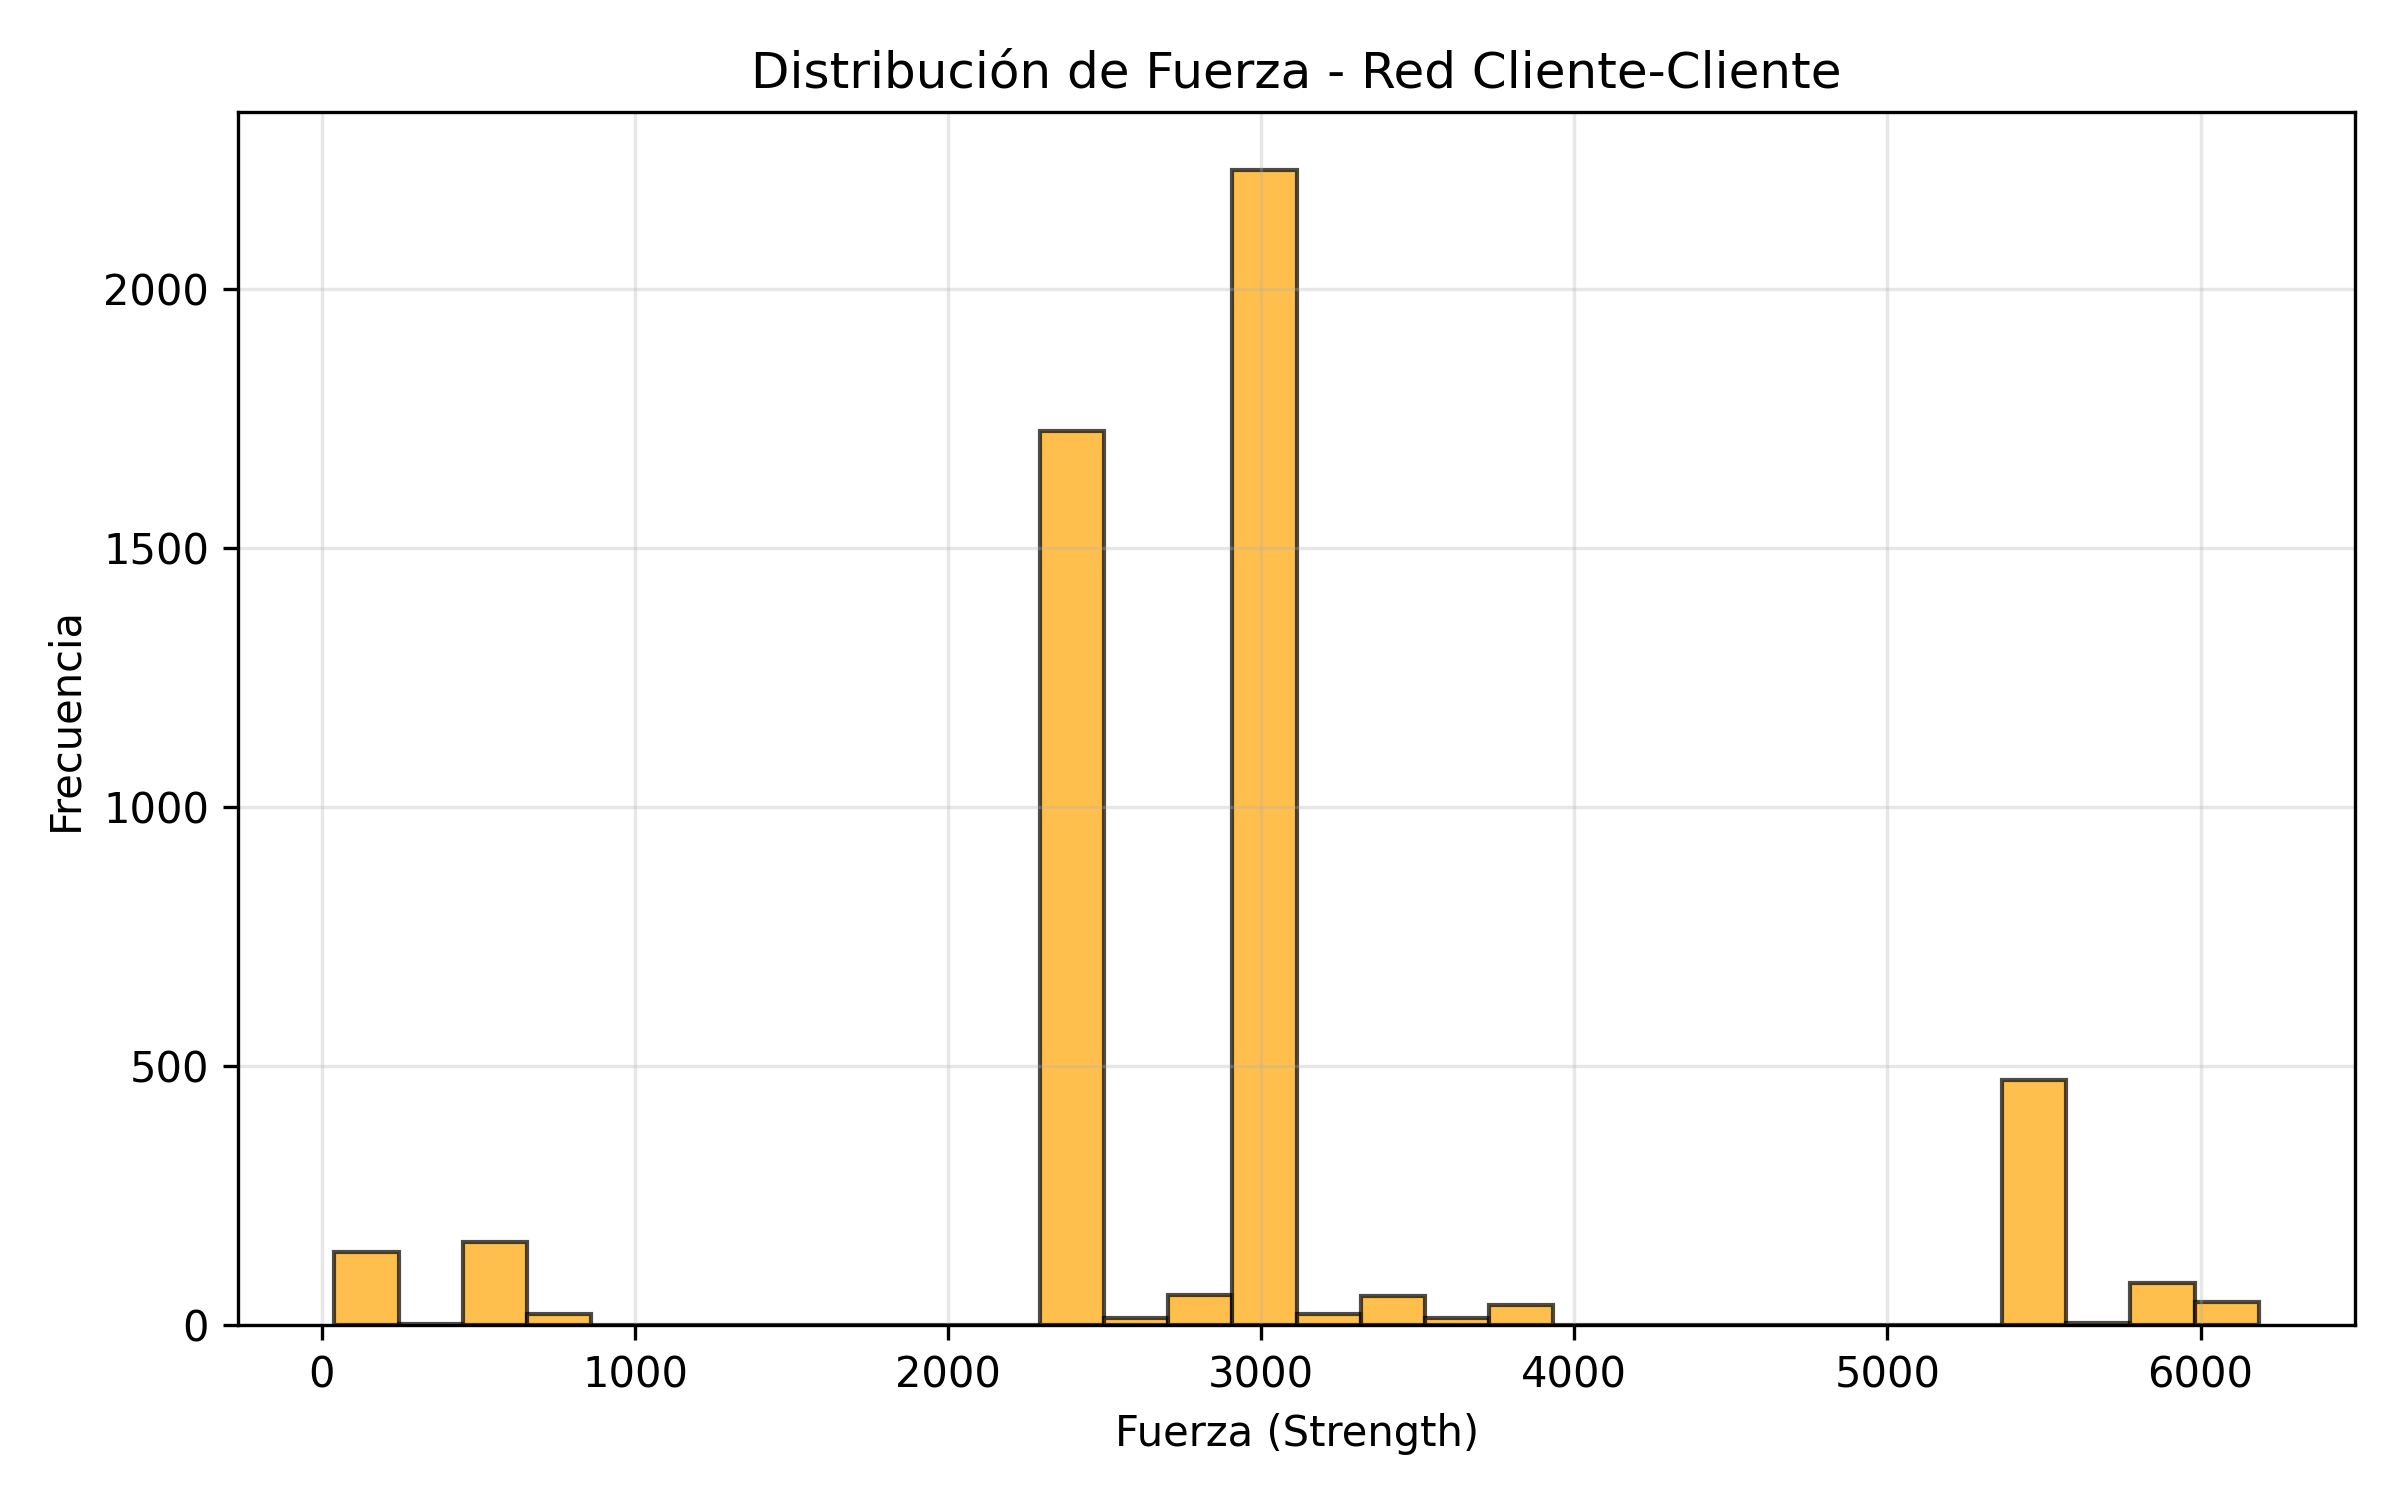

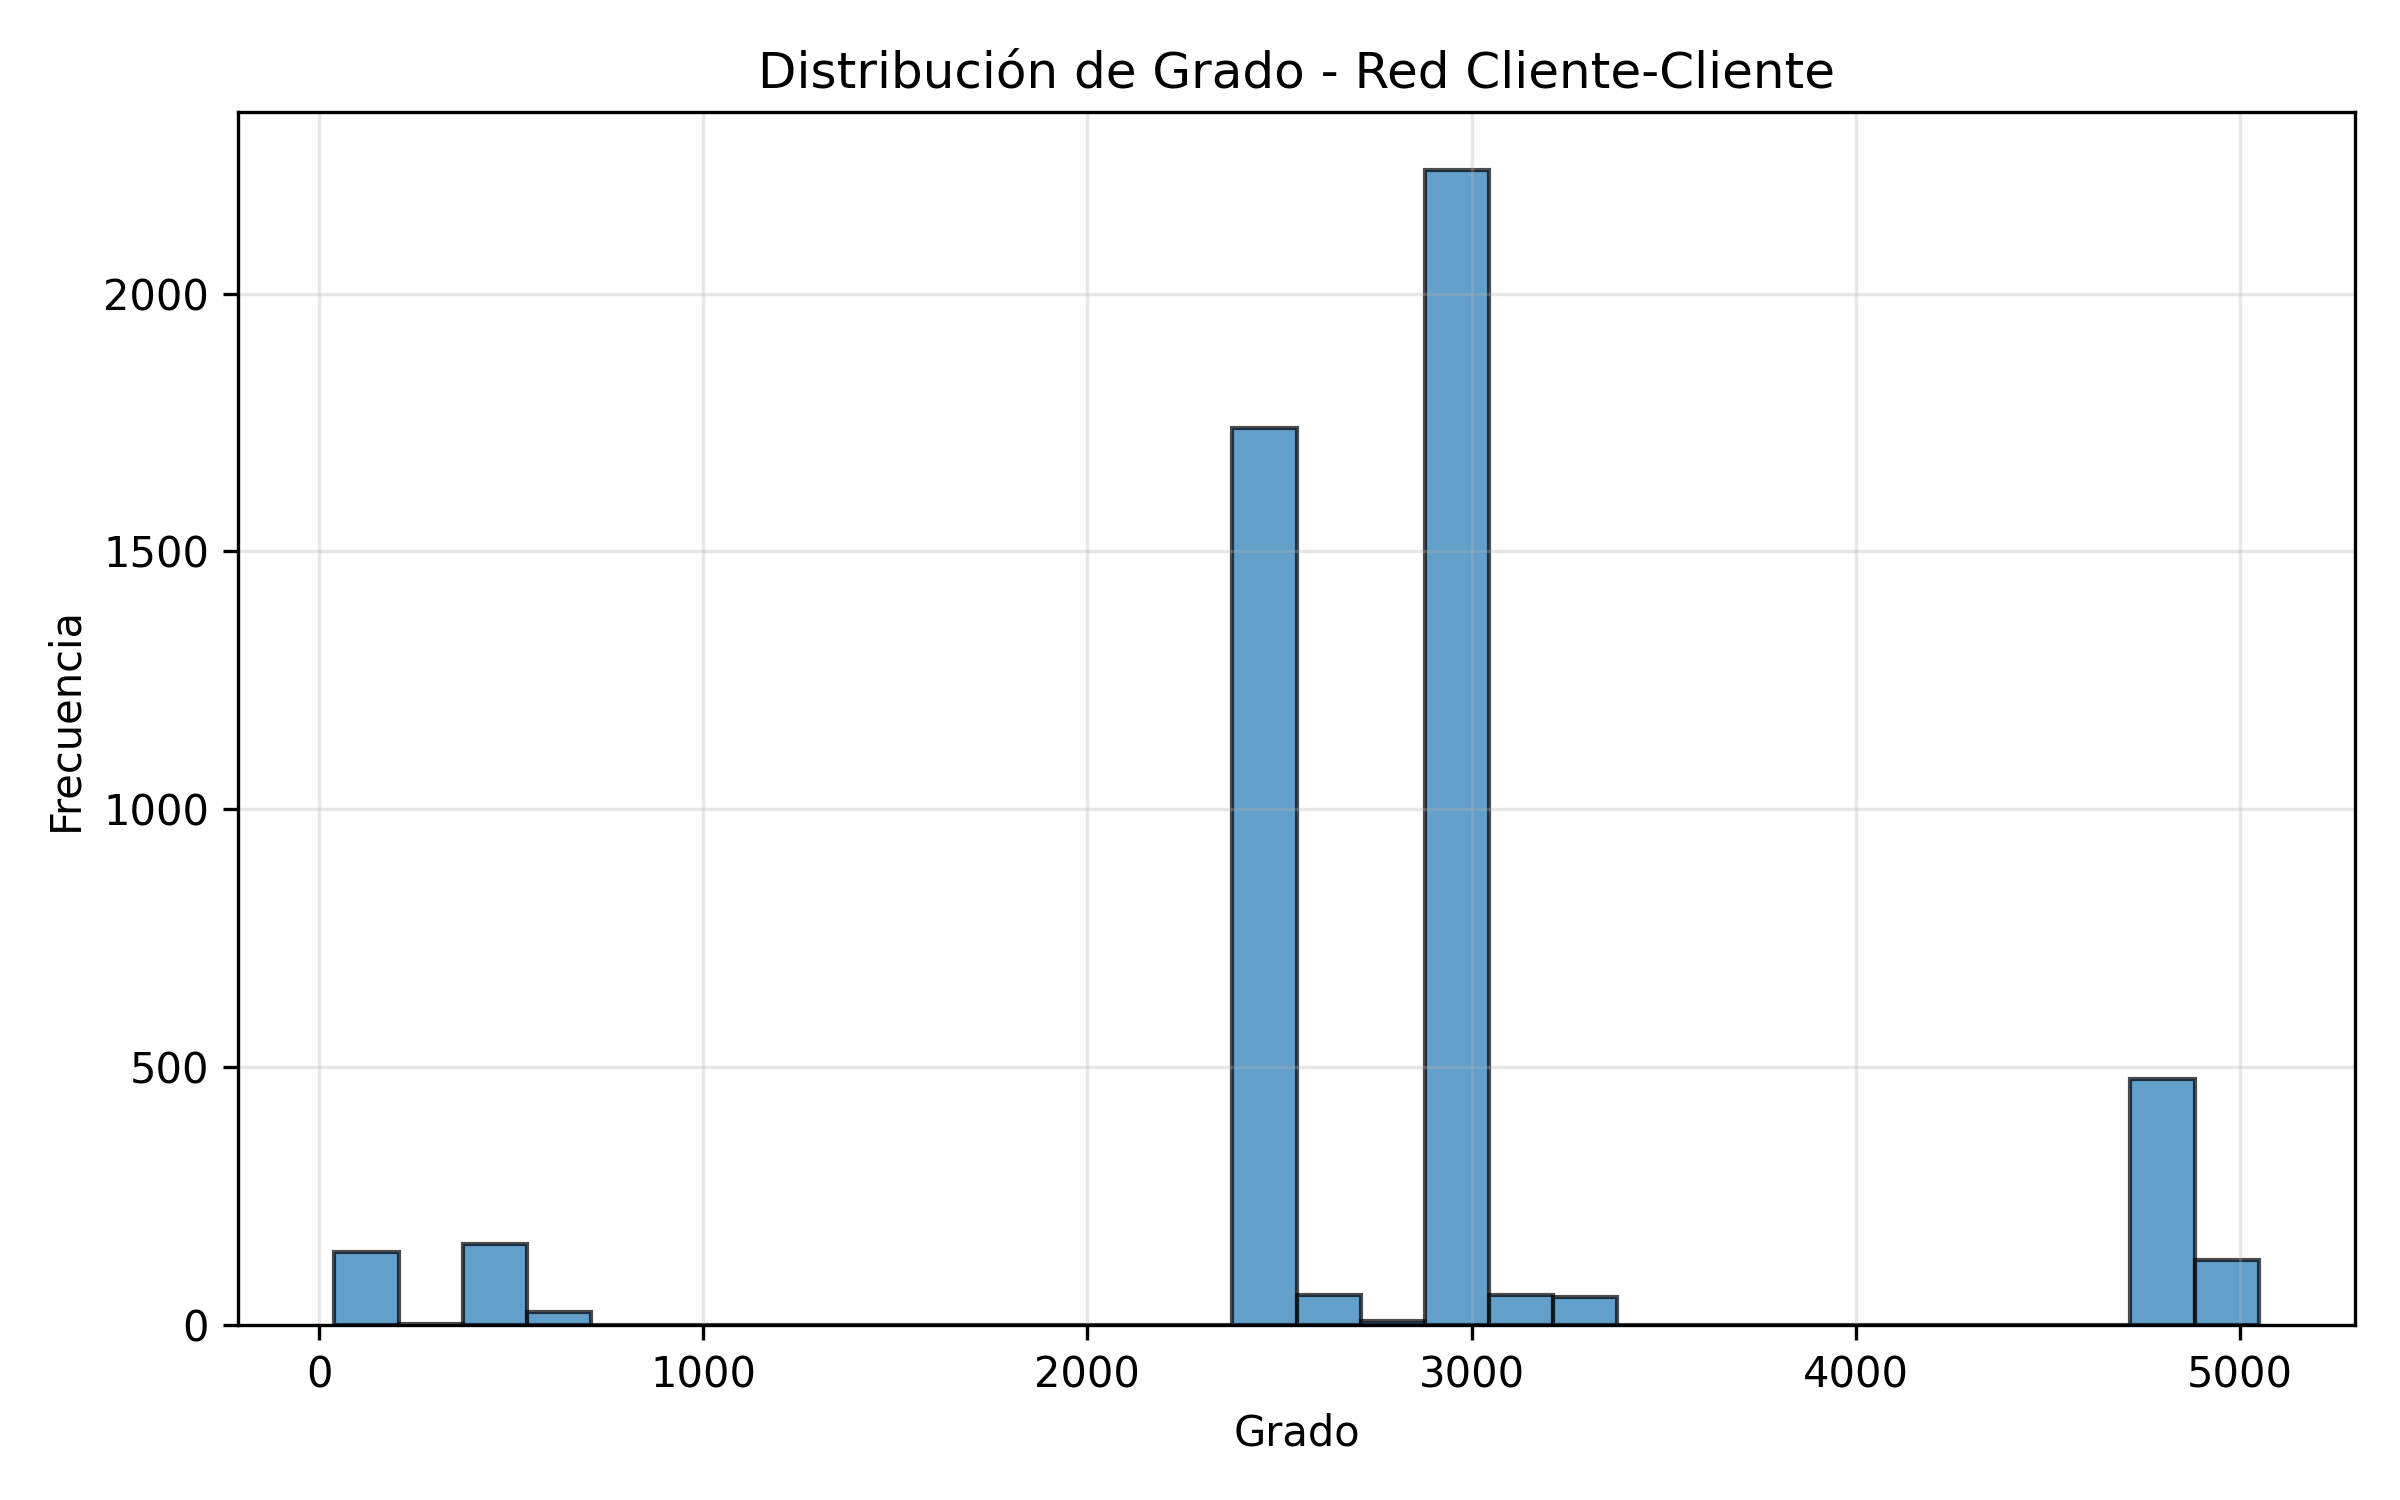